# Comparative Analysis of the wards in Derby UK
This report will be useful for those people moving to Derby or prospective property buyers in Derby since it will enable to have a better understanding of the various wards, the similarity amongst them and their main characteristics. This information will enable the potential property renters/buyers in Derby to make a more informed decision regarding where to settle down.

## 1. Load Data and transfer into a dataframe.
In this section of this notebook, we will gather the data from the various neighborhoods in Toronto and store it into a dataframe, which will be subsequently cleaned as per requested in the assignment instructions.

In [1]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
####################################################################################################
#############HIDDEN INFORMATION#####################################################################
####################################################################################################

# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_0 = pd.read_excel(body)
df_data_0.head()


,Ward,Median House Price,Crime Ratio,Latitude,Longitude
0,Abbey,112000,125.3,52.915000,-1.495000
1,Allestree,247500,41.3,52.948348,-1.493778
2,Alvaston,124975,143.7,52.903394,-1.442030
3,Arboretum,97000,363.4,52.914987,-1.473701
4,Blagreaves,178000,55.2,52.893152,-1.508161


In [2]:
derby_df=df_data_0
derby_df
## The data had been cleaned in the Excel Document which fed the derby_df, so no further data cleaning is required ##

,Ward,Median House Price,Crime Ratio,Latitude,Longitude
0,Abbey,112000,125.3,52.915000,-1.495000
1,Allestree,247500,41.3,52.948348,-1.493778
2,Alvaston,124975,143.7,52.903394,-1.442030
3,Arboretum,97000,363.4,52.914987,-1.473701
4,Blagreaves,178000,55.2,52.893152,-1.508161
5,Boulton,135000,114.0,52.887999,-1.435588
6,Chaddesden,148725,82.5,52.925382,-1.428161
7,Chellaston,184000,63.7,52.870911,-1.440029
8,Darley,165000,135.0,52.940987,-1.478267
9,Derwent,125000,124.1,52.931858,-1.456803


#### Calculation of derby_df shape: it contains the 17 wards in which the city is divided as well as the 5 columns of information associated to each ward.

In [3]:
derby_df.shape

(17, 5)

In [4]:
## Let's check that the data type of the various columns is the right one.
derby_df.dtypes

Ward                   object
Median House Price      int64
Crime Ratio           float64
Latitude              float64
Longitude             float64
dtype: object

In [42]:
print('The average mean price of the properties in the various wards in Derby is:', derby_df['Median House Price'].mean())
print('The average criminality rate of the various wards in Derby is:', derby_df['Crime Ratio'].mean())

The average mean price of the properties in the various wards in Derby is: 157232.23529411765
The average criminality rate of the various wards in Derby is: 107.1941176470588


## 2. Let's visualise Crime Ratio VS Median house price in the various Derby Wards

In [46]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

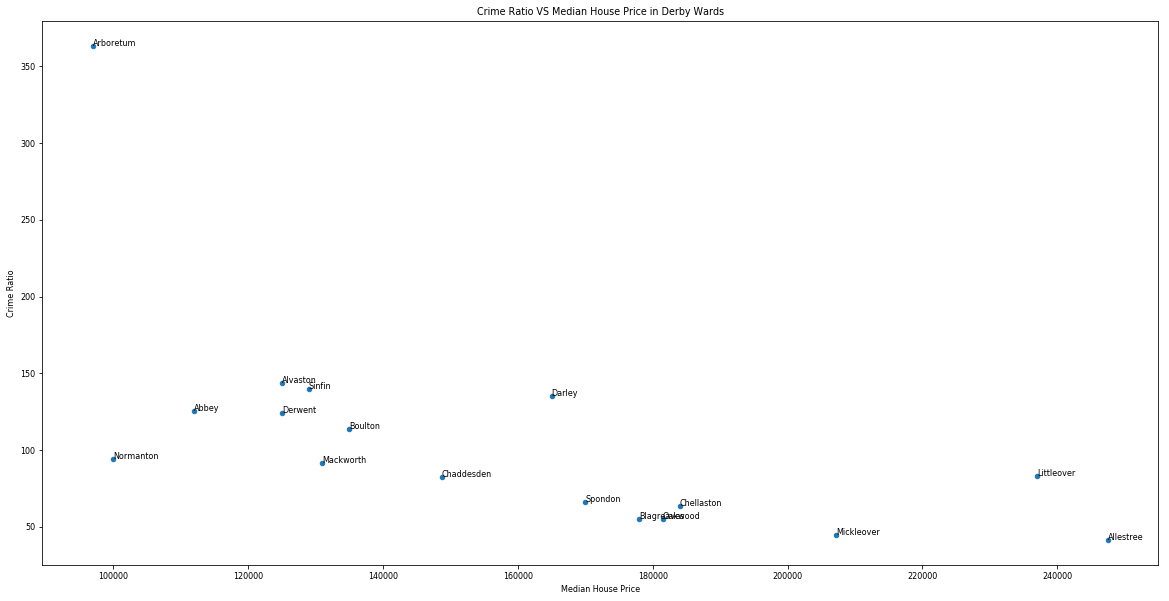

In [61]:
ax = derby_df.plot(kind='scatter',x='Median House Price',y='Crime Ratio')
derby_df[['Median House Price','Crime Ratio','Ward']].apply(lambda row: ax.text(*row),axis=1);
plt.title('Crime Ratio VS Median House Price in Derby Wards')
#plt.figure(figsize=(20,10))
plt.rcParams["figure.figsize"] = (20,10)
#matplotlib.rc('font', size=6)
#matplotlib.rc('axes', titlesize=8)

plt.show()

Text(0.5, 1.0, 'Crime Ratio VS Median House Price in Derby Wards')

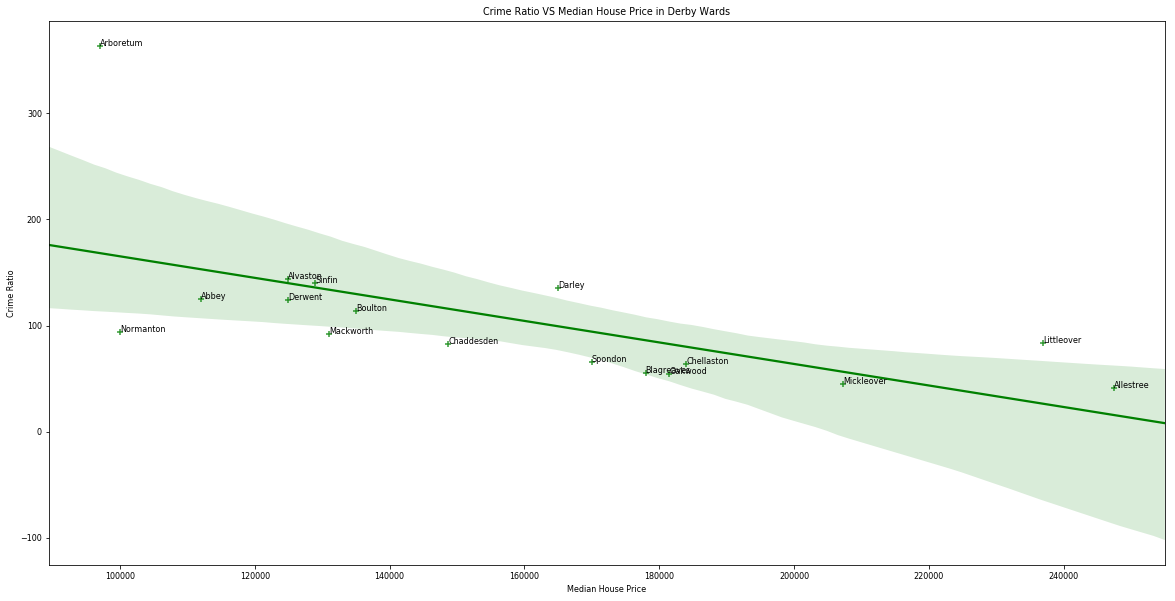

In [63]:
### It seems that there is a relation between the house price, and the criminality rate. Let's plot it
import seaborn as sns
ax=sns.regplot(x='Median House Price',y='Crime Ratio', data=derby_df, color='green', marker='+')
derby_df[['Median House Price','Crime Ratio','Ward']].apply(lambda row: ax.text(*row),axis=1);
plt.title('Crime Ratio VS Median House Price in Derby Wards')

In [66]:
## Let's calculate the Pearson Correlation to understand how strong the relationship is between house price and crime rate
from scipy import stats
pearson_coef, p_value = stats.pearsonr(derby_df['Median House Price'], derby_df['Crime Ratio'])
print('The Pearson coefficient between the Mean House Price and the Crime Ratio in the various Derby wards is', pearson_coef, "and the P-value is", p_value)


The Pearson coefficient between the Mean House Price and the Crime Ratio in the various Derby wards is -0.6106683718816425 and the P-value is 0.009219438449011524


Pearson correlation values can vary between -1 and +1. In this case, a Pearson coefficient of -0.61 indicates a significant negative correlation betwen the Median House prices and Crime Rates in the city of Derby.

***
---
***

## 3. Use Foursquare API data to obtain data from the venues of the wards or neighborhoods in Derby and create maps.
In this case, we will focus on the 17 wards in Derby

### Now we will use the Folium package to create a blank map of Derby

In [160]:
!conda install -c conda-forge folium=0.5.0 --yes
import folium # map rendering library

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2020.6.20          |   py36h9f0ad1d_0         151 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    altair-4.1.0               |             py_1         614 KB  conda-forge
    openssl-1.1.1g             |       h516909a_0         2.1 MB  conda-forge
    ca-certificates-2020.6.20  |       hecda079_0         145 KB  conda-forge
    branca-0.4.1               |             py_0          26 KB  conda-forge
    ------------------------------------------------------------
                       

In [163]:
# create map of Derby using latitude and longitude values
latitude = 52.92304
longitude = -1.4807

map_derby = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, label in zip(derby_df['Latitude'], derby_df['Longitude'], derby_df['Ward']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_derby)  
    
map_derby

### Let's get information from the Foursquare API

In [2]:
######## CLIENT_ID AND CLIENT_SECRET UPDATED TO XXXXXXXXXXXXXXXX AFTER RUNNING EXERCISE TO HIDE ID CREDENTIALS##############

CLIENT_ID = 'XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX' # your Foursquare ID
CLIENT_SECRET = 'XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX' # your Foursquare Secret
VERSION = '20200630' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
CLIENT_SECRET:XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX


In [75]:
## Let's define a function to check wards

def getNearbyVenues(names, latitudes, longitudes, radius=650):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Ward', 
                  'Ward Latitude', 
                  'Ward Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [76]:
### Now we will run the above code on each neighborhood and create a new dataframe called derby_venues.
import requests

LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 650 # define radius

derby_venues = getNearbyVenues(names=derby_df['Ward'],
                                   latitudes=derby_df['Latitude'],
                                   longitudes=derby_df['Longitude']
                                  )

Abbey
Allestree
Alvaston
Arboretum
Blagreaves
Boulton
Chaddesden
Chellaston
Darley
Derwent
Littleover
Mackworth
Mickleover
Normanton
Oakwood
Sinfin
Spondon


In [79]:
## Now we have got the venue information from our list of neighborhoods into a dataframe called derby_venues. Let's explore it.

print(derby_venues.shape)
derby_venues.head()

(134, 7)


,Ward,Ward Latitude,Ward Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Abbey,52.915,-1.495,Rowditch Inn,52.919728,-1.496608,Pub
1,Abbey,52.915,-1.495,Bedford Arms Derby,52.917902,-1.497067,Pub
2,Abbey,52.915,-1.495,Stockbrook Park,52.916171,-1.489772,Park
3,Abbey,52.915,-1.495,International Hotel,52.912740,-1.487096,Hotel
4,Abbey,52.915,-1.495,Balti international,52.918374,-1.499154,Indian Restaurant


In [39]:
## Let's see how many venues there are in each neighbourhood

derby_venues.groupby('Ward').count()

,Ward Latitude,Ward Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Ward,,,,,,
Abbey,7,7,7,7,7,7
Allestree,8,8,8,8,8,8
Alvaston,4,4,4,4,4,4
Arboretum,52,52,52,52,52,52
Blagreaves,3,3,3,3,3,3
Boulton,8,8,8,8,8,8
Chaddesden,4,4,4,4,4,4
Chellaston,5,5,5,5,5,5
Darley,7,7,7,7,7,7


In [84]:
derby_byarea_df=derby_venues.groupby('Ward')[['Venue']].count()
derby_byarea_df.sort_values(by='Venue', ascending=False, axis=0, inplace=True)
derby_byarea_df.head()

,Venue
Ward,
Arboretum,54
Allestree,9
Normanton,8
Abbey,7
Darley,7


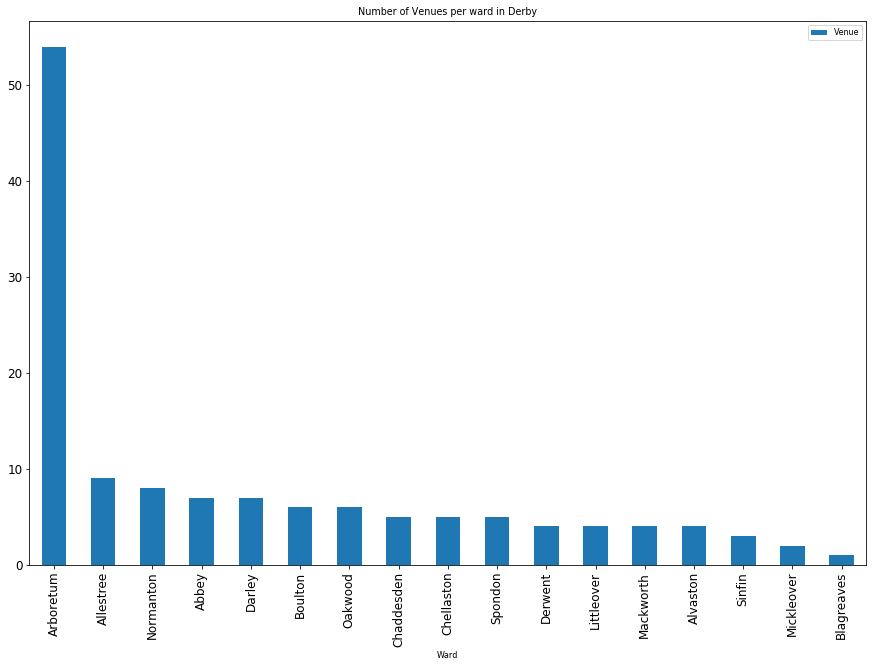

In [86]:
ax = derby_byarea_df[['Venue']].plot(kind='bar', title ="Number of Venues per ward in Derby", figsize=(15, 10), legend=True, fontsize=12)

In [87]:
## Let's check how many categories are:

print('There are {} unique categories.'.format(len(derby_venues['Venue Category'].unique())))

There are 61 unique categories.


In [89]:
derby_mostvenues = derby_venues.groupby('Venue Category').count()
derby_mostvenues.sort_values(by='Ward', ascending=False, axis=0, inplace=True)
derby_mostvenues.head()

,Ward,Ward Latitude,Ward Longitude,Venue,Venue Latitude,Venue Longitude
Venue Category,,,,,,
Grocery Store,15,15,15,15,15,15
Pub,9,9,9,9,9,9
Park,5,5,5,5,5,5
Clothing Store,5,5,5,5,5,5
Indian Restaurant,5,5,5,5,5,5


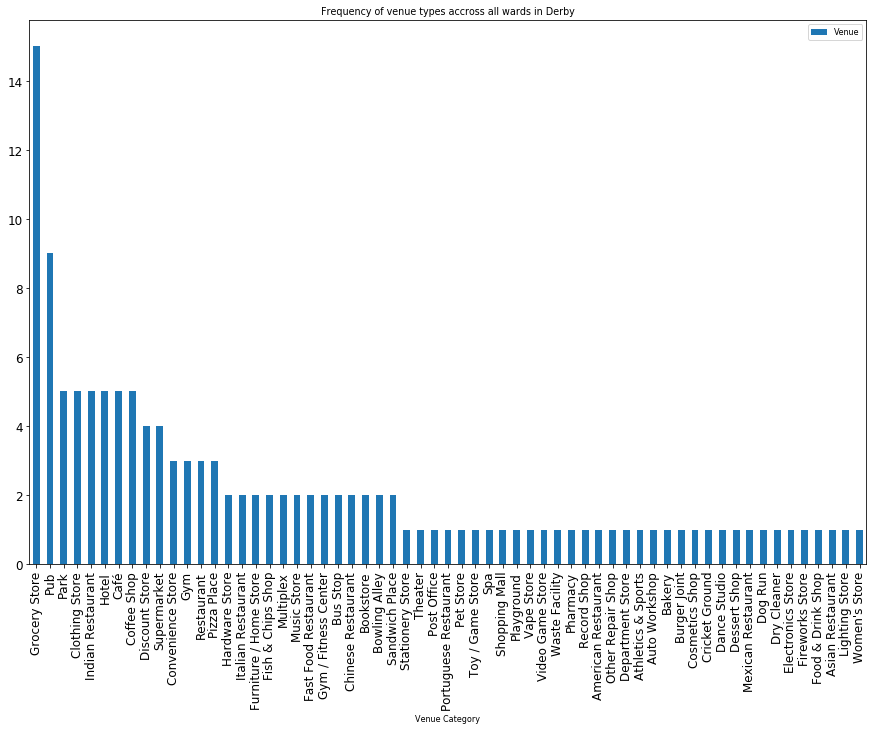

In [90]:
ax = derby_mostvenues[['Venue']].plot(kind='bar', title ="Frequency of venue types accross all wards in Derby", figsize=(15, 10), legend=True, fontsize=12)

### Now we use the one hot encoding technique to get each unique venue category as a column, so that we can then use the dataframe in this format for the k-means clustering analysis

In [91]:
# one hot encoding
derby_onehot = pd.get_dummies(derby_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
derby_onehot['Ward'] = derby_venues['Ward'] 

# move neighborhood column to the first column
fixed_columns = [derby_onehot.columns[-1]] + list(derby_onehot.columns[:-1])
derby_onehot = derby_onehot[fixed_columns]

## let's explore the resulting new dataframe
derby_onehot['Ward'].head(15)

0         Abbey
1         Abbey
2         Abbey
3         Abbey
4         Abbey
5         Abbey
6         Abbey
7     Allestree
8     Allestree
9     Allestree
10    Allestree
11    Allestree
12    Allestree
13    Allestree
14    Allestree
Name: Ward, dtype: object

In [200]:
derby_onehot.head(10)

,Ward,American Restaurant,Asian Restaurant,Athletics & Sports,Auto Workshop,Bakery,Bookstore,Bowling Alley,Burger Joint,Bus Stop,...,Shopping Mall,Spa,Stationery Store,Supermarket,Theater,Toy / Game Store,Vape Store,Video Game Store,Waste Facility,Women's Store
0,Abbey,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Abbey,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Abbey,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Abbey,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Abbey,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Abbey,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,Abbey,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,Allestree,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,Allestree,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,Allestree,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [93]:
derby_onehot.shape

(134, 62)

### Now, we will group all the rows by neighborhood and will calculate mean frequencies for each category in each ward

In [94]:
derby_grouped = derby_onehot.groupby('Ward').mean().reset_index()
derby_grouped
# Now we have the mean occurence of each type of venue in each of the neighborhoods

,Ward,American Restaurant,Asian Restaurant,Athletics & Sports,Auto Workshop,Bakery,Bookstore,Bowling Alley,Burger Joint,Bus Stop,...,Shopping Mall,Spa,Stationery Store,Supermarket,Theater,Toy / Game Store,Vape Store,Video Game Store,Waste Facility,Women's Store
0,Abbey,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.0,0.000000
1,Allestree,0.000000,0.000000,0.000000,0.00,0.111111,0.000000,0.000000,0.000000,0.00,...,0.111111,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.0,0.000000
2,Alvaston,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.0,0.000000
3,Arboretum,0.018519,0.018519,0.000000,0.00,0.000000,0.037037,0.018519,0.018519,0.00,...,0.000000,0.000000,0.018519,0.037037,0.018519,0.018519,0.00,0.018519,0.0,0.018519
4,Blagreaves,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.0,0.000000
5,Boulton,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.0,0.000000
6,Chaddesden,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.20,...,0.000000,0.000000,0.000000,0.200000,0.000000,0.000000,0.00,0.000000,0.2,0.000000
7,Chellaston,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,...,0.000000,0.000000,0.000000,0.200000,0.000000,0.000000,0.00,0.000000,0.0,0.000000
8,Darley,0.000000,0.000000,0.142857,0.00,0.000000,0.000000,0.000000,0.000000,0.00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.0,0.000000
9,Derwent,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.0,0.000000


In [95]:
derby_grouped.shape
# The number of rows now is 17, the number of wards in the city of Derby

(17, 62)

### Now we will create a function to extract the top 10 venues in each neighborhood and store it in a dataframe

In [97]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [98]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

import numpy as np

# create columns according to number of top venues
columns = ['Ward']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Ward'] = derby_grouped['Ward']

for ind in np.arange(derby_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(derby_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

,Ward,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Abbey,Pub,Dry Cleaner,Convenience Store,Hotel,Indian Restaurant,Park,Discount Store,Department Store,Dessert Shop,Women's Store
1,Allestree,Grocery Store,Shopping Mall,Bakery,Café,Pizza Place,Fish & Chips Shop,Fireworks Store,Fast Food Restaurant,Electronics Store,Dry Cleaner
2,Alvaston,Furniture / Home Store,Hardware Store,Park,Pet Store,Grocery Store,Food & Drink Shop,Fish & Chips Shop,Fireworks Store,Fast Food Restaurant,Electronics Store
3,Arboretum,Clothing Store,Coffee Shop,Café,Music Store,Indian Restaurant,Grocery Store,Discount Store,Restaurant,Sandwich Place,Gym / Fitness Center
4,Blagreaves,Indian Restaurant,Women's Store,Cricket Ground,Furniture / Home Store,Food & Drink Shop,Fish & Chips Shop,Fireworks Store,Fast Food Restaurant,Electronics Store,Dry Cleaner
5,Boulton,Dance Studio,Gym,Other Repair Shop,Hotel,Pub,Record Shop,Discount Store,Department Store,Dessert Shop,Women's Store
6,Chaddesden,Bus Stop,Waste Facility,Hotel,Supermarket,Pub,Women's Store,Department Store,Dessert Shop,Discount Store,Dog Run
7,Chellaston,Grocery Store,Supermarket,Chinese Restaurant,Cosmetics Shop,Fish & Chips Shop,Fireworks Store,Food & Drink Shop,Fast Food Restaurant,Cricket Ground,Dry Cleaner
8,Darley,Pub,Convenience Store,Park,Athletics & Sports,Hotel,Restaurant,Discount Store,Department Store,Dessert Shop,Dry Cleaner
9,Derwent,Grocery Store,Playground,Cricket Ground,Furniture / Home Store,Food & Drink Shop,Fish & Chips Shop,Fireworks Store,Fast Food Restaurant,Electronics Store,Dry Cleaner


### Now the data that will be used to cluster the neighborhoods will be prepared.
### The information 'Mean House Price' and 'Crime Ratio' by ward will be joined with the derby_grouped dataframe

In [105]:
derby_df.head()

,Ward,Median House Price,Crime Ratio,Latitude,Longitude
0,Abbey,112000,125.3,52.915000,-1.495000
1,Allestree,247500,41.3,52.948348,-1.493778
2,Alvaston,124975,143.7,52.903394,-1.442030
3,Arboretum,97000,363.4,52.914987,-1.473701
4,Blagreaves,178000,55.2,52.893152,-1.508161


In [112]:
derby_grouped_all = derby_df.join(derby_grouped.set_index('Ward'), on='Ward')
derby_grouped_all.head()

,Ward,Median House Price,Crime Ratio,Latitude,Longitude,American Restaurant,Asian Restaurant,Athletics & Sports,Auto Workshop,Bakery,...,Shopping Mall,Spa,Stationery Store,Supermarket,Theater,Toy / Game Store,Vape Store,Video Game Store,Waste Facility,Women's Store
0,Abbey,112000,125.3,52.915000,-1.495000,0.000000,0.000000,0.0,0.0,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000
1,Allestree,247500,41.3,52.948348,-1.493778,0.000000,0.000000,0.0,0.0,0.111111,...,0.111111,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000
2,Alvaston,124975,143.7,52.903394,-1.442030,0.000000,0.000000,0.0,0.0,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000
3,Arboretum,97000,363.4,52.914987,-1.473701,0.018519,0.018519,0.0,0.0,0.000000,...,0.000000,0.0,0.018519,0.037037,0.018519,0.018519,0.0,0.018519,0.0,0.018519
4,Blagreaves,178000,55.2,52.893152,-1.508161,0.000000,0.000000,0.0,0.0,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000


In [117]:
## Let's delete the columns "Longitude" and "Latitude" that will not be needed in the clustering
derby_grouped_all.dtypes
#derby_grouped_all = derby_grouped_all(["Latitude", "Longitude"], axis=1)
#derby_grouped_all_2.head()

Ward                      object
Median House Price         int64
Crime Ratio              float64
Latitude                 float64
Longitude                float64
American Restaurant      float64
Asian Restaurant         float64
Athletics & Sports       float64
Auto Workshop            float64
Bakery                   float64
Bookstore                float64
Bowling Alley            float64
Burger Joint             float64
Bus Stop                 float64
Café                     float64
Chinese Restaurant       float64
Clothing Store           float64
Coffee Shop              float64
Convenience Store        float64
Cosmetics Shop           float64
Cricket Ground           float64
Dance Studio             float64
Department Store         float64
Dessert Shop             float64
Discount Store           float64
Dog Run                  float64
Dry Cleaner              float64
Electronics Store        float64
Fast Food Restaurant     float64
Fireworks Store          float64
          

In [119]:
derby_grouped_all = derby_grouped_all.drop(["Latitude", "Longitude"], axis=1)
derby_grouped_all.head()

,Ward,Median House Price,Crime Ratio,American Restaurant,Asian Restaurant,Athletics & Sports,Auto Workshop,Bakery,Bookstore,Bowling Alley,...,Shopping Mall,Spa,Stationery Store,Supermarket,Theater,Toy / Game Store,Vape Store,Video Game Store,Waste Facility,Women's Store
0,Abbey,112000,125.3,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000
1,Allestree,247500,41.3,0.000000,0.000000,0.0,0.0,0.111111,0.000000,0.000000,...,0.111111,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000
2,Alvaston,124975,143.7,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000
3,Arboretum,97000,363.4,0.018519,0.018519,0.0,0.0,0.000000,0.037037,0.018519,...,0.000000,0.0,0.018519,0.037037,0.018519,0.018519,0.0,0.018519,0.0,0.018519
4,Blagreaves,178000,55.2,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000


### The dataframe derby_grouped_all contains all the necessary information to perform the cluster analysis, however first the data needs to be normalised.

In [122]:
from sklearn.preprocessing import StandardScaler
X = derby_grouped_all.values[:,1:]
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet
# Now the data is normalised.

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[-1.04167378,  0.25111905, -0.25      , ..., -0.25      ,
        -0.25      , -0.25      ],
       [ 2.07881754, -0.91391671, -0.25      , ..., -0.25      ,
        -0.25      , -0.25      ],
       [-0.74286659,  0.50631736, -0.25      , ..., -0.25      ,
        -0.25      , -0.25      ],
       ...,
       [ 0.55887343, -0.72667882, -0.25      , ..., -0.25      ,
        -0.25      , -0.25      ],
       [-0.65017303,  0.45361336, -0.25      , ..., -0.25      ,
        -0.25      , -0.25      ],
       [ 0.29403468, -0.57272766, -0.25      , ..., -0.25      ,
        -0.25      , -0.25      ]])

## Apply K means Clustering to identify optimum numbers of clusters using Elbow Method and Silhouette Method

In [147]:
from sklearn.cluster import KMeans
# set number of clusters
kclusters = 2

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Clus_dataSet)

# check cluster labels generated for each row in the dataframe
kmeans.labels_ 

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

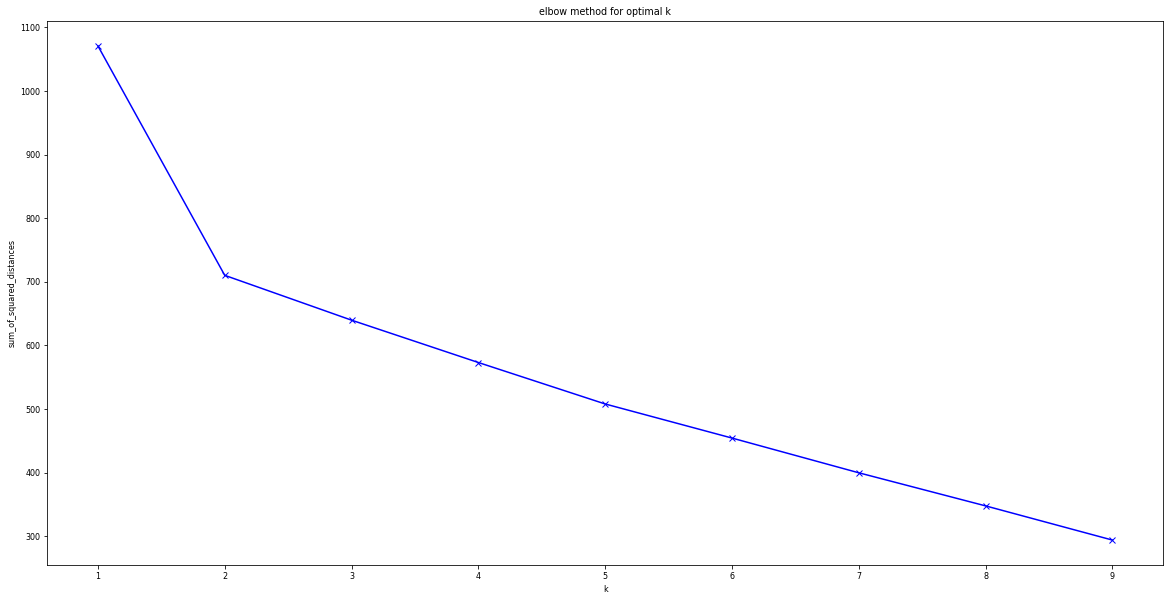

In [124]:
#ELBOW METHOD TO CALCULATE OPTIMUM POINTS OF CLUSTERS
#for each value of k, we can initialise k_means and use inertia to identify the sum of squared distances of samples to the nearest cluster centre
sum_of_squared_distances = []
K = range(1,10)
for k in K:
    k_means = KMeans(n_clusters=k)
    model = k_means.fit(Clus_dataSet)
    sum_of_squared_distances.append(k_means.inertia_)
    
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('sum_of_squared_distances')
plt.title('elbow method for optimal k')
plt.show()



In [148]:
#SILHOUETTE SCORE
from sklearn import metrics
from sklearn.metrics import silhouette_score
sil_score = []
kmax=10
for k in range(2, kmax+1):
    k_means = KMeans(n_clusters=k).fit(Clus_dataSet)
    labels = k_means.labels_
    metrics.silhouette_score(Clus_dataSet, labels, metric = 'euclidean')
    sil_score.append(silhouette_score(Clus_dataSet, labels, metric = 'euclidean'))
    print('The silhouette_score with k=', k, 'is', silhouette_score(Clus_dataSet, labels, metric = 'euclidean'))


The silhouette_score with k= 2 is 0.5009872339712952
The silhouette_score with k= 3 is 0.05470823221472304
The silhouette_score with k= 4 is 0.06595868833471291
The silhouette_score with k= 5 is 0.055566586985901646
The silhouette_score with k= 6 is 0.06450997897369301
The silhouette_score with k= 7 is 0.04164859399166949
The silhouette_score with k= 8 is 0.01763679505254837
The silhouette_score with k= 9 is 0.014492213755402406
The silhouette_score with k= 10 is 0.023287930651521987


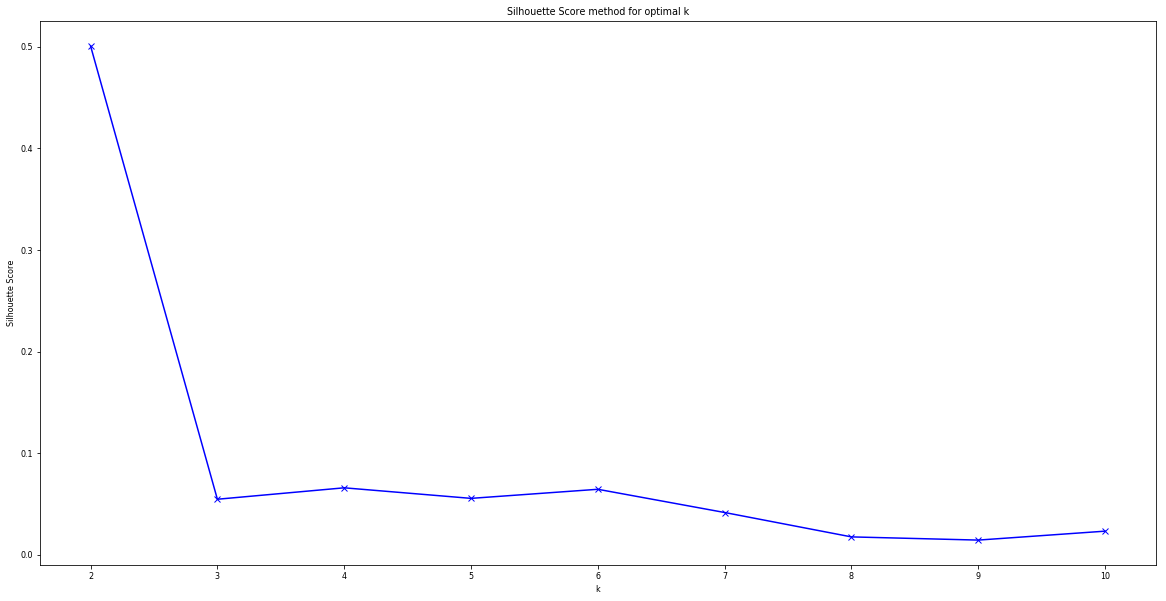

In [149]:
#### A high silhouette score is desired => optimum value is k=2
K = range(2,11)
plt.plot(K, sil_score, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score method for optimal k')
plt.show()

### Using the Elbow and the Silhouette Methods, it has been determined that the optimum would be to set 2 clusters

In [150]:
kclusters = 2
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Clus_dataSet)

# check cluster labels generated for each row in the dataframe
kmeans.labels_ 

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

### Once all the clusters have been estimated, a combined dataframe including cluster information with the previous information will be created

In [152]:
# merge derby_df with neighborhoods_venues_sorted to have all related information for each ward into a dataframe
derby_merged = derby_df.join(neighborhoods_venues_sorted.set_index('Ward'), on='Ward')
# Add the clustering neighbors to this derby_merged dataframe
derby_merged.insert(0,'Cluster Labels', kmeans.labels_)
derby_merged.head()

,Cluster Labels,Ward,Median House Price,Crime Ratio,Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,1,Abbey,112000,125.3,52.915000,-1.495000,Pub,Dry Cleaner,Convenience Store,Hotel,Indian Restaurant,Park,Discount Store,Department Store,Dessert Shop,Women's Store
1,1,Allestree,247500,41.3,52.948348,-1.493778,Grocery Store,Shopping Mall,Bakery,Café,Pizza Place,Fish & Chips Shop,Fireworks Store,Fast Food Restaurant,Electronics Store,Dry Cleaner
2,1,Alvaston,124975,143.7,52.903394,-1.442030,Furniture / Home Store,Hardware Store,Park,Pet Store,Grocery Store,Food & Drink Shop,Fish & Chips Shop,Fireworks Store,Fast Food Restaurant,Electronics Store
3,0,Arboretum,97000,363.4,52.914987,-1.473701,Clothing Store,Coffee Shop,Café,Music Store,Indian Restaurant,Grocery Store,Discount Store,Restaurant,Sandwich Place,Gym / Fitness Center
4,1,Blagreaves,178000,55.2,52.893152,-1.508161,Indian Restaurant,Women's Store,Cricket Ground,Furniture / Home Store,Food & Drink Shop,Fish & Chips Shop,Fireworks Store,Fast Food Restaurant,Electronics Store,Dry Cleaner


In [153]:
# Understanding of Cluster Labels for each Derby ward
derby_merged[['Ward','Cluster Labels']]

,Ward,Cluster Labels
0,Abbey,1
1,Allestree,1
2,Alvaston,1
3,Arboretum,0
4,Blagreaves,1
5,Boulton,1
6,Chaddesden,1
7,Chellaston,1
8,Darley,1
9,Derwent,1


### After having completed the previous analysis, we can now plot the results with the generated clusters in the Derby map

In [201]:
# Import required modules for plotting
import matplotlib.cm as cm
import matplotlib.colors as colors

# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(derby_merged['Latitude'], derby_merged['Longitude'], derby_merged['Ward'], derby_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

(picture obtained by folium added as a picture to the notebook to allow being visualised in github)

### Now we have the final map with the neighborhoods clustered into the 2 different areas.  All wards except Arboterum are categorized in one cluster.

In [154]:
derby_merged.groupby('Cluster Labels')['Ward'].count()

Cluster Labels
0     1
1    16
Name: Ward, dtype: int64

#### We can observe that the "Cluster 0" includes only 1 neighborhood in Derby, whereas "Clusters 1" includes all remaining 16 wards in Derby. Let's understand the key characteristics of those 2 clusters.

In [156]:
## Cluster 0
derby_merged.loc[derby_merged['Cluster Labels'] == 0, derby_merged.columns[[1] + list(range(1, derby_merged.shape[1]))]]

,Ward,Ward,Median House Price,Crime Ratio,Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,Arboretum,Arboretum,97000,363.4,52.914987,-1.473701,Clothing Store,Coffee Shop,Café,Music Store,Indian Restaurant,Grocery Store,Discount Store,Restaurant,Sandwich Place,Gym / Fitness Center


In [157]:
## Cluster 1
derby_merged.loc[derby_merged['Cluster Labels'] == 1, derby_merged.columns[[1] + list(range(1, derby_merged.shape[1]))]]

,Ward,Ward,Median House Price,Crime Ratio,Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Abbey,Abbey,112000,125.3,52.915000,-1.495000,Pub,Dry Cleaner,Convenience Store,Hotel,Indian Restaurant,Park,Discount Store,Department Store,Dessert Shop,Women's Store
1,Allestree,Allestree,247500,41.3,52.948348,-1.493778,Grocery Store,Shopping Mall,Bakery,Café,Pizza Place,Fish & Chips Shop,Fireworks Store,Fast Food Restaurant,Electronics Store,Dry Cleaner
2,Alvaston,Alvaston,124975,143.7,52.903394,-1.442030,Furniture / Home Store,Hardware Store,Park,Pet Store,Grocery Store,Food & Drink Shop,Fish & Chips Shop,Fireworks Store,Fast Food Restaurant,Electronics Store
4,Blagreaves,Blagreaves,178000,55.2,52.893152,-1.508161,Indian Restaurant,Women's Store,Cricket Ground,Furniture / Home Store,Food & Drink Shop,Fish & Chips Shop,Fireworks Store,Fast Food Restaurant,Electronics Store,Dry Cleaner
5,Boulton,Boulton,135000,114.0,52.887999,-1.435588,Dance Studio,Gym,Other Repair Shop,Hotel,Pub,Record Shop,Discount Store,Department Store,Dessert Shop,Women's Store
6,Chaddesden,Chaddesden,148725,82.5,52.925382,-1.428161,Bus Stop,Waste Facility,Hotel,Supermarket,Pub,Women's Store,Department Store,Dessert Shop,Discount Store,Dog Run
7,Chellaston,Chellaston,184000,63.7,52.870911,-1.440029,Grocery Store,Supermarket,Chinese Restaurant,Cosmetics Shop,Fish & Chips Shop,Fireworks Store,Food & Drink Shop,Fast Food Restaurant,Cricket Ground,Dry Cleaner
8,Darley,Darley,165000,135.0,52.940987,-1.478267,Pub,Convenience Store,Park,Athletics & Sports,Hotel,Restaurant,Discount Store,Department Store,Dessert Shop,Dry Cleaner
9,Derwent,Derwent,125000,124.1,52.931858,-1.456803,Grocery Store,Playground,Cricket Ground,Furniture / Home Store,Food & Drink Shop,Fish & Chips Shop,Fireworks Store,Fast Food Restaurant,Electronics Store,Dry Cleaner
10,Littleover,Littleover,237000,83.1,52.904978,-1.516901,Park,Fireworks Store,Bus Stop,Women's Store,Cricket Ground,Furniture / Home Store,Food & Drink Shop,Fish & Chips Shop,Fast Food Restaurant,Electronics Store


In [159]:
## Cluster 1
derby_merged.mean()

Cluster Labels             0.941176
Median House Price    157232.235294
Crime Ratio              107.194118
Latitude                  52.912310
Longitude                 -1.473539
dtype: float64

In [205]:
derby_clusters = derby_onehot.groupby('Ward').sum().reset_index()
derby_clusters.insert(0,'Cluster Labels', kmeans.labels_)
derby_clusters
derby_clusters.groupby('Cluster Labels').sum()

#0 = derby_onehot.loc[derby_onehot['Ward'== 'Arboretum']]
#derby_cluster0

#df.loc[df['column_name'] == some_value]

,American Restaurant,Asian Restaurant,Athletics & Sports,Auto Workshop,Bakery,Bookstore,Bowling Alley,Burger Joint,Bus Stop,Café,...,Shopping Mall,Spa,Stationery Store,Supermarket,Theater,Toy / Game Store,Vape Store,Video Game Store,Waste Facility,Women's Store
Cluster Labels,,,,,,,,,,,,,,,,,,,,,
0,1,1,0,0,0,2,1,1,0,3,...,0,0,1,2,1,1,0,1,0,1
1,0,0,1,1,1,0,1,0,2,2,...,1,1,0,2,0,0,1,0,1,0


In [214]:
derby_clusters_sum = derby_clusters.groupby('Cluster Labels').sum()
derby_clusters_sum_t=derby_clusters_sum.transpose()
derby_clusters_sum_t.rename(columns={0: "Cluster 0", 1: "Cluster 1"})

Cluster Labels,Cluster 0,Cluster 1
American Restaurant,1,0
Asian Restaurant,1,0
Athletics & Sports,0,1
Auto Workshop,0,1
Bakery,0,1
Bookstore,2,0
Bowling Alley,1,1
Burger Joint,1,0
Bus Stop,0,2
Café,3,2


In [223]:
print('The total number of venues in Cluster 0 is', derby_clusters_sum_t[0].sum())
print('The total number of venues in Cluster 1 is', derby_clusters_sum_t[1].sum())

The total number of venues in Cluster 0 is 54
The total number of venues in Cluster 1 is 80


/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


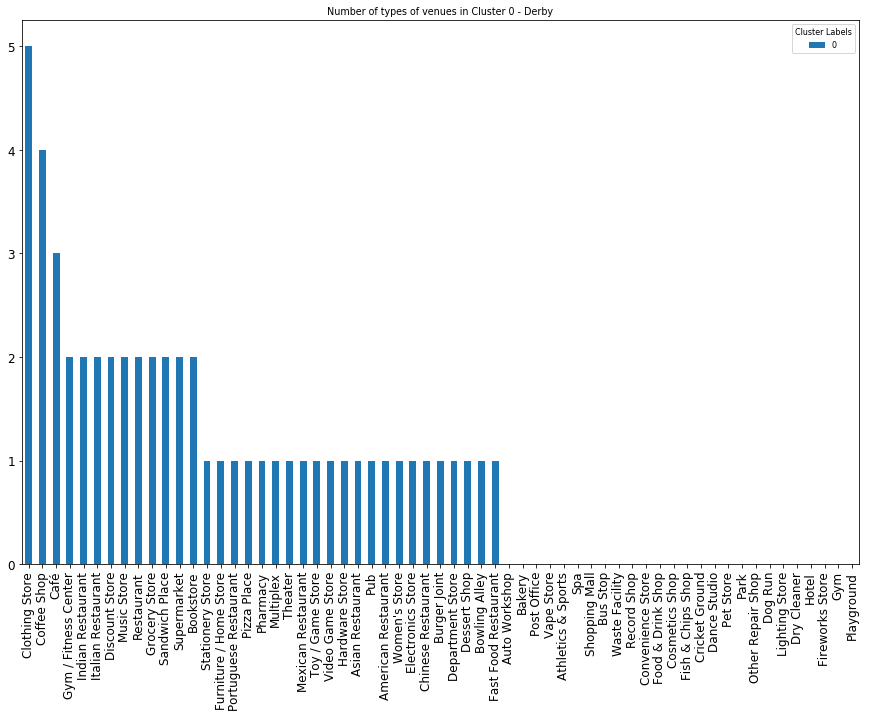

In [224]:
cluster0 = derby_clusters_sum_t[[0]]
cluster0.sort_values(by=0, ascending=False, axis=0, inplace=True)
cluster0.head()

ax1 = cluster0[[0]].plot(kind='bar', title ="Number of types of venues in Cluster 0 - Derby", figsize=(15, 10), legend=True, fontsize=12)

In [220]:
cluster1 = derby_clusters_sum_t[[1]]
cluster1.sort_values(by=1, ascending=False, axis=0, inplace=True)
cluster1.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


Cluster Labels,1
Grocery Store,13
Pub,8
Park,5
Hotel,5
Convenience Store,3


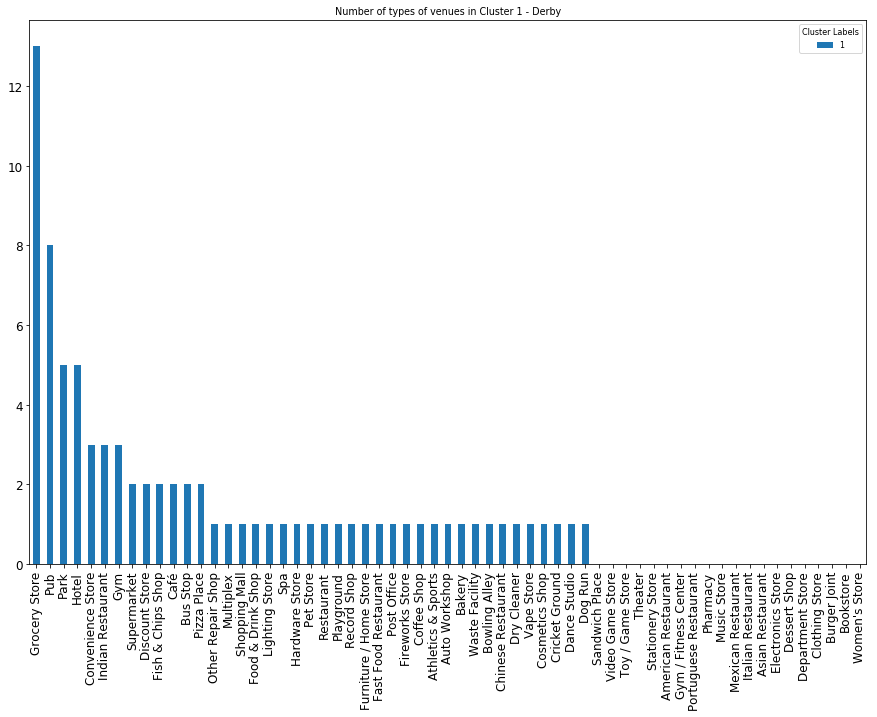

In [225]:
ax2 = cluster1[[1]].plot(kind='bar', title ="Number of types of venues in Cluster 1 - Derby", figsize=(15, 10), legend=True, fontsize=12)

### After analysing each of the 2 clusters, it can be said that:
**Cluster 0** - this cluster only contains the Arboretum ward, situated just in the City Center. In this cluster, the Mean House Price is significantly lower than in the Cluster 1, however the Crime Rite is much higher. Observing that the most common venues in this cluster are clothing and music stores, coffee shops and grocery shops, it can be considered that the Arboretum area is mostly a shopping and restauration district. Only this Cluster includes the 40% of the total venues in Derby accouding to the Foursquare API.
For potential home buyers, this would not be the ideal area to settle if worried about safety.

**Cluster 1** - this cluster seems to include the remaining wards in Derby which are more residential areas. The average crime rates in all these areas is significantly lower, as well as the mean house prices more expensive than in Cluster 0. In the wards included in Cluster 1 most of the ammenities are grocery stores, pubs and parks, so it seems that the areas in this cluster are more quiet than cluster 0. The 16 wards of Derby included in this cluster include the 60% of the venues in Derby according to the Foursquare API.


END